# COMP1008 2020/21 Coursework - Credit Risk Prediction
<b>Student Name</b>: xxx<br>
<b>Student ID</b>: xxx

## Task description

Credit scoring is an analysis by financial institutions to valuate a person's or business creditworthiness. You will work on a credit risk classification task based on a given dataset of 1000 customers' records collected at a bank. The aim is to help the bank manager to predict the credit risk of new customers and make better decisions on approving their loan applications.
- <b>Dataset</b>: <a href="https://moodle.nottingham.ac.uk/pluginfile.php/7184288/mod_tabbedcontent/tabcontent/21279/data-CreditRisk.xls">data-CreditRisk.xls</a>, available in Moodle COMP1008 page ('Course Content / Assessment')
- Coursework issue <a href="https://moodle.nottingham.ac.uk/pluginfile.php/7184288/mod_tabbedcontent/tabcontent/21279/Assessment%20Sheet%20COMP1008.docx">form</a>

Use this Jupyter Notebook file 'COMP1008cw.ipynb' as the template to write your report, answering the below questions and displaying the corresponding codes which support your answers.

## Question 1. Data Analysis and Preparation (6 marks)

### 1a. Basic data analysis and plottings
Display your code and the appropriate plottings to support your answers to the following questions:
- Are most of the existing customers 'good' or 'bad' customers? [0.5 marks]<br>
- Are customers with shorter durations more likely to have good or bad credit? [0.5 marks]

<b>Answers</b>: (add your answers in markdown cells)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Code: (add your code in code cells)
credit_df = pd.read_excel('data/data.xls')


In [6]:
credit_df

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,0,67,male,2.0,own,NaN,little,1169.0,6.0,radio/TV,good
1,1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,2,49,male,1.0,own,little,NaN,2096.0,12.0,education,good
3,3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1.0,own,little,NaN,1736.0,NaN,furniture/equipment,good
996,996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,10,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,17,25,male,2.0,own,NaN,little,8072.0,30.0,business,good


In [7]:
credit_df.describe()

,ID,Age,Job,CreditAmount,Duration
count,1000.000000,1000.000000,996.000000,997.000000,995.000000
mean,499.500000,35.546000,1.902610,3276.432297,20.896482
std,288.819436,11.375469,0.653981,2825.236506,12.083060
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1366.000000,12.000000
50%,499.500000,33.000000,2.000000,2323.000000,18.000000
75%,749.250000,42.000000,2.000000,3973.000000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


Text(0.5, 1.0, 'Pie chart showing Risk of customers')

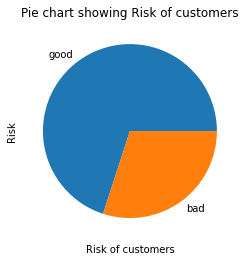

In [8]:
credit_df['Risk'].value_counts().plot(kind='pie')
plt.xlabel('Risk of customers')
plt.title("Pie chart showing Risk of customers")

The pie chart drawn shows that most customers are good customers.

In [9]:
credit_df.groupby(['Risk'])['Duration'].count()  


Risk
bad     300
good    695
Name: Duration, dtype: int64

<AxesSubplot:xlabel='Risk'>

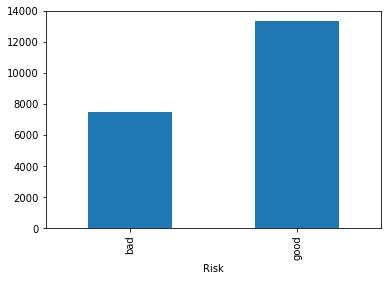

In [10]:
credit_df.groupby(['Risk'])['Duration'].sum().plot(kind ='bar')

Text(0.5, 1.0, 'Comparing the average duration to risk ')

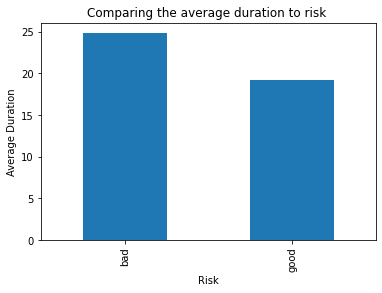

In [11]:
credit_df.groupby(['Risk'])['Duration'].mean() .plot(kind = 'bar')
plt.ylabel('Average Duration')
plt.title('Comparing the average duration to risk ')


Customers with a shorter duration are more likely to have a good credit evident from the graph.

Do male or female customers have higher CreditAmount on average? Do good customers have higher CreditAmount on average than bad customers? Disply the code and appropriate plottings to support your answers. [1 mark]

<b>Answers</b>: 

Text(0.5, 1.0, 'Comparing the average CreditAmount to Sex ')

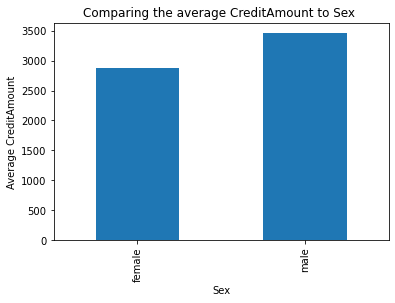

In [12]:
# Code:
credit_df.groupby(['Sex'])['CreditAmount'].mean() .plot(kind = 'bar')
plt.ylabel('Average CreditAmount')
plt.title('Comparing the average CreditAmount to Sex ')

Males have a higher credit Amount on average than females.

Text(0.5, 1.0, 'Comparing the average CreditAmount to risk ')

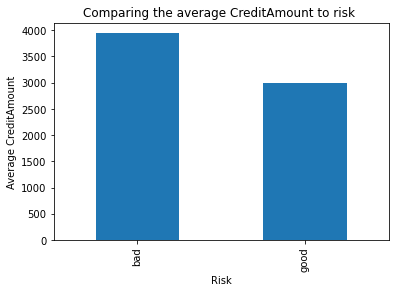

In [13]:
credit_df.groupby(['Risk'])['CreditAmount'].mean() .plot(kind = 'bar')
plt.ylabel('Average CreditAmount')
plt.title('Comparing the average CreditAmount to risk ')

Bad customers on average have a higher CreditAmount than good customers.

Analyse 'Housing' against customers' credit risks. Among customers of different 'Housing' types, which are more likely to have good credits? Provide the codea dn appropriate plotting(s) to support your answers. [0.5 marks]

<b>Answers</b>: 

Text(0.5, 1.0, 'Different housing types which have good credit')

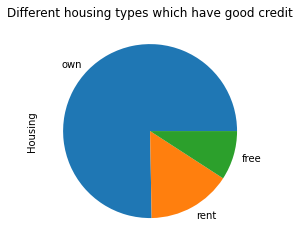

In [14]:
# Code: 
housing_types = credit_df.Housing[credit_df.Risk == "good"].value_counts().plot(kind='pie')
plt.title('Different housing types which have good credit')



From the graph we can tell that people who own their own houses are more likely to have the best credit compared to those who rent houses and those that are free, after that its those who rent houses, then those that are free as we can see from the graph.

### 1b. Data Pre-processing

What issues do you observe in which of the input features in the data? Show the codes which detect these issues. What potential issues this may cause if the data is not pre-processed or processed inappropriately? [1 mark]<br>

<b>Answers</b>: 

In [15]:
# Code: 
credit_df.isnull()

,ID,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,False,False,False,False,False,True,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,True,False,True,False,False
996,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,True,False,False,False,False,False


In [16]:
credit_df.isnull().sum()

ID                  0
Age                 0
Sex                 0
Job                 4
Housing             0
SavingAccounts    183
CheckAccount      394
CreditAmount        3
Duration            5
Purpose             0
Risk                0
dtype: int64

Issues observed: some columns had empty data such as job,SavingAccounts,CheckAccount,CreditAmount and duration.
Furthermore column such as ID does not appear to be a useful column in this data.
In addition columns such as checkAccount,HousingSavingsaccount,Purpose,Sex and Risk are not numerical but rather categorical.
If data is not pre-processed or processed inappropriately when building machine learning models it will cause a problem as most algorithims in sklearn can only handel complete and numerical values.



Show the steps of code to address the above observed issues with features. Briefly explain the reason to support your selected functions / methods. [1 mark]

<b>Answers</b>: 

This code was done in order to drop the column ID from the data

In [17]:
# Code:
credit_df=credit_df.drop('ID', axis =1)
credit_df





,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,67,male,2.0,own,NaN,little,1169.0,6.0,radio/TV,good
1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49,male,1.0,own,little,NaN,2096.0,12.0,education,good
3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1.0,own,little,NaN,1736.0,NaN,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,NaN,little,8072.0,30.0,business,good


To avoid skewness and handling data wrong, due to the fact that job only had 4 missing data set, in order to avoid loss of data it is not dropped, and since the data set is small as it is only a 1000, it works quite well.
SavingAccounts and CheckAccounts have been given a value of none, where the set was empty, this is to make it aware to the risk amanger that these people do not actually have one.

In [18]:
m = credit_df['Job'].median()
credit_df['Job'].fillna(m,inplace = True)
credit_df['SavingAccounts'].fillna('none', inplace=True)
credit_df['CheckAccount'].fillna('none', inplace=True)
credit_df

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,67,male,2.0,own,none,little,1169.0,6.0,radio/TV,good
1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49,male,1.0,own,little,none,2096.0,12.0,education,good
3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1.0,own,little,none,1736.0,NaN,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,none,little,8072.0,30.0,business,good


In [19]:
credit_df.isnull().sum()

Age               0
Sex               0
Job               0
Housing           0
SavingAccounts    0
CheckAccount      0
CreditAmount      3
Duration          5
Purpose           0
Risk              0
dtype: int64

In [20]:
credit_df

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,67,male,2.0,own,none,little,1169.0,6.0,radio/TV,good
1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49,male,1.0,own,little,none,2096.0,12.0,education,good
3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1.0,own,little,none,1736.0,NaN,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,none,little,8072.0,30.0,business,good


Yet again the missing data for the column duration was small as a result to avoid skewness i used the meidan to fill in the missing data values.

In [21]:
n = credit_df['Duration'].median()
credit_df['Duration'].fillna(n,inplace = True)
credit_df

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,67,male,2.0,own,none,little,1169.0,6.0,radio/TV,good
1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49,male,1.0,own,little,none,2096.0,12.0,education,good
3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1.0,own,little,none,1736.0,18.0,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,none,little,8072.0,30.0,business,good


In [22]:
n = credit_df['CreditAmount'].median()
credit_df['CreditAmount'].fillna(n,inplace = True)
credit_df

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,67,male,2.0,own,none,little,1169.0,6.0,radio/TV,good
1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49,male,1.0,own,little,none,2096.0,12.0,education,good
3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1.0,own,little,none,1736.0,18.0,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,none,little,8072.0,30.0,business,good


In [23]:
credit_df.isnull().sum()

Age               0
Sex               0
Job               0
Housing           0
SavingAccounts    0
CheckAccount      0
CreditAmount      0
Duration          0
Purpose           0
Risk              0
dtype: int64

Yet again the missing data for the column CreditAmount was small as a result to avoid skewness i used the median to fill in the missing data values.

In [24]:

credit_df

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,67,male,2.0,own,none,little,1169.0,6.0,radio/TV,good
1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49,male,1.0,own,little,none,2096.0,12.0,education,good
3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1.0,own,little,none,1736.0,18.0,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,none,little,8072.0,30.0,business,good


Prepare the data ready for building the machine learning models in Questions 2 and 3. Show and explain the functions / methods. Why this preparation is needed? [1.5 marks]<br>
Note: include here all your data pre-processing steps needed for building all models in Questions 2 and 3.

<b>Answers</b>: 

Mosrt algorithims in sklearn require numerical values and as a result where words are given they would need to be mapped to  numerical values to avoid errors.
We also have to normalise the data is so the data can be reorganised so that users ca propoerly utilize the data for further queries and analysis. We aim to get rid of any duplicate data that may appear in the dataset. 
Normalising data is also beneficial as tt also then logically groups data so data that relate together are stored together.
In this method we have rescaled the values to  be between 0-1.

In [25]:
credit_df

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,67,male,2.0,own,none,little,1169.0,6.0,radio/TV,good
1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49,male,1.0,own,little,none,2096.0,12.0,education,good
3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1.0,own,little,none,1736.0,18.0,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,none,little,8072.0,30.0,business,good


In [26]:
credit_df.dropna()

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,67,male,2.0,own,none,little,1169.0,6.0,radio/TV,good
1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49,male,1.0,own,little,none,2096.0,12.0,education,good
3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1.0,own,little,none,1736.0,18.0,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,none,little,8072.0,30.0,business,good


In [27]:
credit_df

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose,Risk
0,67,male,2.0,own,none,little,1169.0,6.0,radio/TV,good
1,22,female,2.0,own,little,moderate,5951.0,48.0,radio/TV,bad
2,49,male,1.0,own,little,none,2096.0,12.0,education,good
3,45,male,2.0,free,little,little,7882.0,42.0,furniture/equipment,good
4,53,male,2.0,free,little,little,4870.0,24.0,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1.0,own,little,none,1736.0,18.0,furniture/equipment,good
996,40,male,3.0,own,little,little,3857.0,30.0,car,good
997,25,female,2.0,rent,little,moderate,1295.0,12.0,car,bad
998,25,male,2.0,own,none,little,8072.0,30.0,business,good


In [28]:

credit_df['Sex'] = credit_df['Sex'].map({'female' : 0, 'male':1})
credit_df['Housing'] = credit_df['Housing'].map({'free': 0, 'own' : 1, 'rent' : 2})
credit_df['SavingAccounts'] = credit_df['SavingAccounts'].map({'none' : 0, 'little' : 1, 'moderate' :2, 'rich' : 3, 'quite rich' : 4})
credit_df['CheckAccount'] = credit_df['CheckAccount'].map({'none' : 0, 'little' : 1, 'moderate' :2, 'rich' : 3})
credit_df['Purpose'] = credit_df['Purpose'].map({'business' : 0, 'car' : 1, 'domestic appliances' : 2, 'education' : 3, 'furniture/equipment' : 4, 'radio/TV' : 5, 'repairs' : 6, 'vacation/others' : 7})


In [29]:
target = credit_df['Risk']

In [30]:
target = target.map({'good' : 0, 'bad' : 1})

In [31]:
target

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    1
998    0
999    0
Name: Risk, Length: 1000, dtype: int64

In [32]:
data = credit_df.drop('Risk',1)

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.3)

In [34]:
credit_df.isna().any()

Age               False
Sex               False
Job               False
Housing           False
SavingAccounts    False
CheckAccount      False
CreditAmount      False
Duration          False
Purpose           False
Risk              False
dtype: bool

In [35]:
#data = data.dropna()

In [36]:
data

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose
0,67,1,2.0,1,0,1,1169.0,6.0,5
1,22,0,2.0,1,1,2,5951.0,48.0,5
2,49,1,1.0,1,1,0,2096.0,12.0,3
3,45,1,2.0,0,1,1,7882.0,42.0,4
4,53,1,2.0,0,1,1,4870.0,24.0,1
...,...,...,...,...,...,...,...,...,...
995,31,0,1.0,1,1,0,1736.0,18.0,4
996,40,1,3.0,1,1,1,3857.0,30.0,1
997,25,0,2.0,2,1,2,1295.0,12.0,1
998,25,1,2.0,1,0,1,8072.0,30.0,0


In [37]:
target.isna().any()

False

In [38]:
#credit_df['SavingAccounts'].describe()

In [39]:
credit_df.isna().sum()

Age               0
Sex               0
Job               0
Housing           0
SavingAccounts    0
CheckAccount      0
CreditAmount      0
Duration          0
Purpose           0
Risk              0
dtype: int64

In [40]:
credit_df.isna().values.any()

False

In [41]:
credit_df.isna().any().sum()


0

In [42]:
data.isna().any()

Age               False
Sex               False
Job               False
Housing           False
SavingAccounts    False
CheckAccount      False
CreditAmount      False
Duration          False
Purpose           False
dtype: bool

In [43]:
data

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose
0,67,1,2.0,1,0,1,1169.0,6.0,5
1,22,0,2.0,1,1,2,5951.0,48.0,5
2,49,1,1.0,1,1,0,2096.0,12.0,3
3,45,1,2.0,0,1,1,7882.0,42.0,4
4,53,1,2.0,0,1,1,4870.0,24.0,1
...,...,...,...,...,...,...,...,...,...
995,31,0,1.0,1,1,0,1736.0,18.0,4
996,40,1,3.0,1,1,1,3857.0,30.0,1
997,25,0,2.0,2,1,2,1295.0,12.0,1
998,25,1,2.0,1,0,1,8072.0,30.0,0


In [44]:
data=(data-data.min())/(data.max()-data.min())

In [45]:
data

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose
0,0.857143,1.0,0.666667,0.5,0.00,0.333333,0.050567,0.029412,0.714286
1,0.053571,0.0,0.666667,0.5,0.25,0.666667,0.313690,0.647059,0.714286
2,0.535714,1.0,0.333333,0.5,0.25,0.000000,0.101574,0.117647,0.428571
3,0.464286,1.0,0.666667,0.0,0.25,0.333333,0.419941,0.558824,0.571429
4,0.607143,1.0,0.666667,0.0,0.25,0.333333,0.254209,0.294118,0.142857
...,...,...,...,...,...,...,...,...,...
995,0.214286,0.0,0.333333,0.5,0.25,0.000000,0.081765,0.205882,0.571429
996,0.375000,1.0,1.000000,0.5,0.25,0.333333,0.198470,0.382353,0.142857
997,0.107143,0.0,0.666667,1.0,0.25,0.666667,0.057500,0.117647,0.142857
998,0.107143,1.0,0.666667,0.5,0.00,0.333333,0.430395,0.382353,0.000000


In [46]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.3)

In [47]:
#70% used for training and 30% used for testing

## Question 2. Artificial Neural Networks (ANN) (7 marks)

### 2a. Build and evaluate your first ANN (i.e. ann1)
Show the steps to build and train <i>ann1</i> with one-hidden layer of 5 neurons. Explain breifly what the input features and/or target output are, and their type and value range, in the training and testing data. [1 mark] <br>
Note: if additional data processing is needed, add them to your answers to the last question of Question 1.

<b>Answers</b>: 
The input features are:age,sex,job,Housing,SavingAccounts,CheckAccount, CreditAmount, Duraion and purpose. Which can be seen when printing off x_train
The output feature is the Risk, which can be seen when printing off y_train.


In [60]:
x_train

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose
516,0.375000,1.0,0.333333,0.5,0.25,0.333333,0.061131,0.029412,0.142857
348,0.267857,1.0,0.333333,0.5,0.50,0.000000,0.082150,0.029412,0.000000
21,0.446429,1.0,0.666667,1.0,1.00,0.333333,0.131892,0.029412,0.714286
598,0.214286,1.0,0.666667,0.5,0.25,0.000000,0.138935,0.205882,0.142857
444,0.196429,0.0,1.000000,0.5,0.25,0.666667,0.266645,0.647059,0.571429
...,...,...,...,...,...,...,...,...,...
867,0.410714,1.0,0.666667,0.5,0.25,0.000000,0.169528,0.117647,0.571429
74,0.375000,1.0,1.000000,0.5,0.00,0.333333,0.095026,0.470588,0.428571
482,0.678571,0.0,0.666667,1.0,0.75,0.333333,0.185540,0.382353,0.571429
522,0.607143,1.0,0.666667,0.0,0.25,0.333333,0.377958,0.647059,0.571429


In [61]:
y_train

516    0
348    0
21     0
598    1
444    1
      ..
867    0
74     1
482    0
522    1
992    0
Name: Risk, Length: 700, dtype: int64

In [62]:
x = data
y = target



In [118]:
x

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose
0,0.857143,1.0,0.666667,0.5,0.00,0.333333,0.050567,0.029412,0.714286
1,0.053571,0.0,0.666667,0.5,0.25,0.666667,0.313690,0.647059,0.714286
2,0.535714,1.0,0.333333,0.5,0.25,0.000000,0.101574,0.117647,0.428571
3,0.464286,1.0,0.666667,0.0,0.25,0.333333,0.419941,0.558824,0.571429
4,0.607143,1.0,0.666667,0.0,0.25,0.333333,0.254209,0.294118,0.142857
...,...,...,...,...,...,...,...,...,...
995,0.214286,0.0,0.333333,0.5,0.25,0.000000,0.081765,0.205882,0.571429
996,0.375000,1.0,1.000000,0.5,0.25,0.333333,0.198470,0.382353,0.142857
997,0.107143,0.0,0.666667,1.0,0.25,0.666667,0.057500,0.117647,0.142857
998,0.107143,1.0,0.666667,0.5,0.00,0.333333,0.430395,0.382353,0.000000


In [119]:
y

0      0
1      1
2      0
3      0
4      1
      ..
995    0
996    0
997    1
998    0
999    0
Name: Risk, Length: 1000, dtype: int64

In [54]:
# Code: 
ann1 = MLPClassifier(hidden_layer_sizes=(5),max_iter=3000)
ann1.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=5, max_iter=3000)

What's the accuracy of <i>ann1</i>? What does this mean in terms of classifying new customers? [0.5 marks]<br>
Show the steps to calculate the accuracy of <i>ann1</i> on the training data and testing data, respectively. Is <i>ann1</i> a good model on classifying new customers? Explain the reasons to support your answers. [1 mark]

### <b>Answers</b>: 
The accuracy for ann1 is around 70.5 % this means that out of 10 new customers we would be able to predict the credit for 7 new customers (roughly) correct. As a result of this I would classify this to be a good model.
Furhtermore due to the test and training accuracy being similar values no overfiting occurs and this model does not just have to be used for the inital data set, and can be used as a general model as it is stable.



In [79]:
from sklearn import metrics

In [121]:
# Code: 

y_pred = ann1.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7433333333333333


In [122]:
x_predict = ann1.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.7371428571428571


In [123]:
print(cross_val_score(ann1, data, target, cv=10, scoring='accuracy').mean())

0.7059999999999998


In [124]:
from sklearn.model_selection import cross_val_score


Display and explain the confusion matrix of <i>ann1</i>. Is <i>ann1</i> good at predicting 'good' or 'bad' customers? Show the steps which calculate the comparisons. [1 mark]

In [163]:
def cf_matrix(mat, t_name):
    
    fig, ax = plt.subplots()
    im = ax.imshow(mat)
    
    ax.set_xticks(range(0,len(t_name)))
    ax.set_yticks(range(0,len(t_name)))
    ax.set_xticklabels(t_name)
    ax.set_yticklabels(t_name)

    for i in range(0,len(t_name)):
        for j in range(0,len(t_name)):
            text = ax.text(j, i, mat[i, j], ha="center", va="center", color="w")
    
    plt.ylabel('true label')
    plt.xlabel('predicted label')

In [127]:
from sklearn.metrics import confusion_matrix

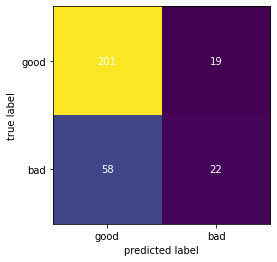

In [128]:
# Code: 

cm = confusion_matrix(y_test,y_pred)

target_names = ['good', 'bad']
cf_matrix(cm,target_names)


In [129]:
cm

array([[201,  19],
       [ 58,  22]], dtype=int64)

<b>Answers:</b>
The confusion matrix shows that we could classify 91% of customers correct in having good credit. We worked it out by doing  (201/(201+19))*100.
The confusion matrix also shows we could classify roughly around 27.5%  customers correct in terms of having bad credit.
However the model classifes 58 cusrtomers  to have good credit when really they have bad credit.
Furhtemore the model classifies 19 people to have bad credit when they actually have good credit.
Overall the classification accuracy is 74.3% which is the same as when using the function: metrics.accuracy_score(y_test,y_pred)).


### 2b. Build and evaluate another ANN (i.e. ann2)
Show the steps to build <i>ann2</i> with a different setting (e.g. different no. of hidden layers and / or neurons, etc.). Explain briefly the different setting of <i>ann2</i>. [0.5 marks]

<b>Answers</b>: 
This ann now has 2 hidden layers of 5 and 5. I used the same number neuron in order to focus specifically on the importance of using more than one hidden layer.

In [57]:
# Code: 
ann2 = MLPClassifier(hidden_layer_sizes=(5,5),max_iter=3000)
ann2.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(5, 5), max_iter=3000)

Show the steps to calculate the accuracy of <i>ann2</i> on the training data and testing data, respectively. Is <i>ann2</i> a good model? Explain the reasons. [0.5 marks]<br>

# <b>Answers</b>: 
ann2 is a good model because when using the cross_val_score function we are given a percentage of 70.5, so this means out of 10 new customers, we could predict 7 new customers correctly. Furhtermore the difference in % accuracy between the training accuracy and testing accuracy is similar and as a result shows this model can be used as a generals model and is stable, therefore making it a good model.

In [131]:
# Code: 
y_pred = ann2.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7566666666666667


In [132]:
x_predict = ann2.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.74


In [66]:
from sklearn.model_selection import cross_val_score

In [133]:

print(cross_val_score(ann1, x,y, cv=10, scoring='accuracy').mean())

0.7050000000000001


Print and explain the confusion matrix of <i>ann2</i>. Which of <i>ann1</i> and <i>ann2</i> is better, and why? [1 mark]

<b>Answers</b>: 
We have 198 people predicted with good credit which is correct and 29 people predicted with bad credit which is also correct.
Although we have 51 where we predicted would have good credit but actually has bad credit, and 22 where we predicted to have bad credit but actually have good credit

Among the 220 people who have good credit score the neural network correctly classifies (198/220) *100 = 90%
Among the 90 people who have bad credit the neural network correctly classifies (29/80)*100= 36.25% correct.
Overall the classification accuracy is 75.67% which is the same accuracy as when using (metrics.accuracy_score(y_test,y_pred)).
From the two model I believe ann1 is a better model than ann2 when it comes to predicitng customers with good and bad credit, as it gives a higher % accuracy.
Although due to ann2 giving a higher overall classification accuracy % it can be said that ann2 is a better model.

In [157]:
from sklearn.metrics import confusion_matrix

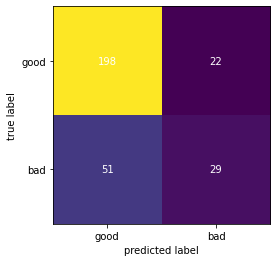

In [134]:
# Code: 

cm1 = confusion_matrix(y_test,y_pred)

target_names = ['good', 'bad']
cf_matrix(cm1,target_names)

Use cross-validation, and together with the analysis on their confusion matrix, explain which of <i>ann1</i> and <i>ann2</i> is better. Show the steps to support your analysis. [1.5 marks]

<b>Answers</b>: 
From cross validation the ann2 model gives a higher % accuracy and as a result can be said to be a better model. The overall classification for ann2 was also higher so therefore is evident that this model would be better. 

In [135]:
# Code: 
ann1ad = MLPClassifier(hidden_layer_sizes=(5),max_iter=3000)
acc_ann = cross_val_score(ann1ad,x,y,cv=10,scoring='accuracy').mean()
acc_ann

0.7020000000000001

In [136]:
ann2ad = MLPClassifier(hidden_layer_sizes=(5,5),max_iter=3000)
acc_ann2 = cross_val_score(ann2ad,x,y,cv=10,scoring='accuracy').mean()
acc_ann2

0.7120000000000001

## Question 3. Decision Tree (12 marks)

### 3a. Build and evaluate your first decision tree (i.e. dt1)

Show the steps to build and train <i>dt1</i> with a depth of 3, using the same settings of data as those for <i>ann1</i> in Question 2a.<br>
Calculate the accuracy of <i>dt1</i> on the training data and testing data, respectively. Explain if <i>dt1</i> is a good model on classifying new customers. [1 mark]

<b>Answers</b>: 
for 10 customers we can predict 7 of them correctly. so it is also a good way to classify customers. The accuracy when using cross validation is 70%. Furhtemore there is not a significance difference between the training accuracy and testing accuracy, and as a result there is no worry about overfitting, and this is  a stable model that can be used for general prediction.

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Code: 

dt1 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)


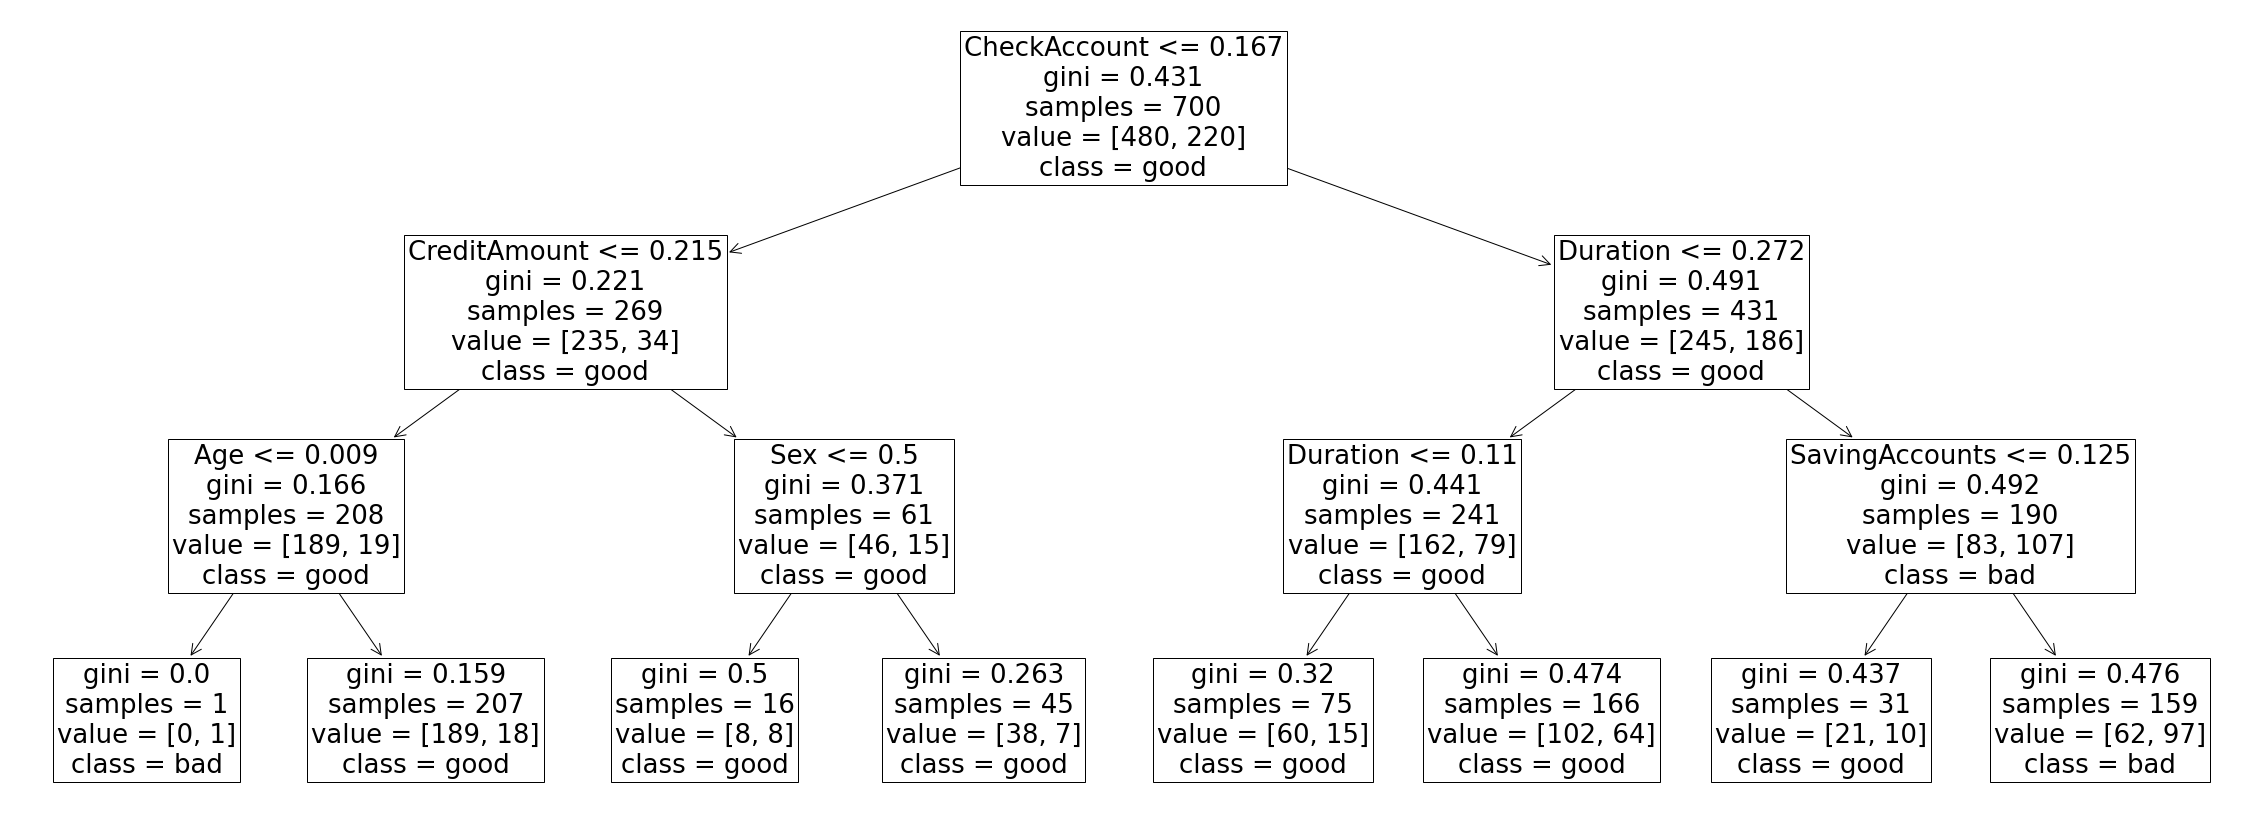

In [138]:
from sklearn import tree

target_names = ['good','bad']

plt.figure(figsize=(40,15))
_ = tree.plot_tree(dt1,feature_names = data.columns, class_names=target_names, fontsize=26)
plt.show()

In [139]:

y_predict = dt1.predict(x_test) 
print (metrics.accuracy_score(y_test,y_predict)) 

0.7333333333333333


In [140]:
x_predict = dt1.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.7371428571428571


In [141]:
print(cross_val_score(dt1, x,y, cv=10, scoring='accuracy').mean())

0.706


Print and explain the confusion matrix of <i>dt1</i>. Is <i>dt1</i> good at predicting 'good' or 'bad' customers? [0.5 marks]

<b>Answers</b>: 
From the confusiom matrix We have 191 people predicted with good credit (true positive) which is correct and 29 people predicted with bad credit (true negative) which is also correct.
Although we have 51 where we predicted would have good credit but actually has bad credit, and 29 where we predicted to have bad credit but actually have good credit

Among the 220 people who have good credit score the neural network correctly classifies (191/220) *100 = 86.8%
Among the 80 people who have bad credit the neural network correctly classifies (29/80)*100= 36.25% correct.
Overall the classification accuracy is 73.3% which is the same accuracy as when using (metrics.accuracy_score(y_test,y_pred)).


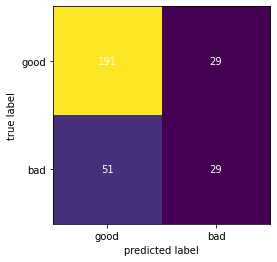

In [143]:
# Code: 
cm2 = confusion_matrix(y_test,y_predict)

target_names = ['good', 'bad']
cf_matrix(cm2,target_names)

### 3b. Build another decision tree (i.e. dt2)
Remove one input feature from the data and show your steps to build <i>dt2</i> with the reduced data. Observe and explain which input feature affects the accuracy of <i>dt2</i> the most (using k-fold cross-validation). [2 marks]

<b>Answers</b>: 
dropped the 'CheckAccount' column, for dt2.
When it then came to working out which input feature affects the accuracy of dt2 the mostl, I first used cross validation to check if there were any significant differences, in the individual data when a feature was removed.
After I saw the cross validation score all gave me the same number of 0.706 I then went to look at the x_predict where I can notice some changes to the values as I remove data as a result, it was clear that Age had the most effect because when Age was dropped the accuracy was the lowest.


In [68]:
dt2 = data.copy()

In [60]:
# Code: 
dt2 = data.drop('CheckAccount',axis=1)

In [90]:
data

,Age,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose
0,0.857143,1.0,0.666667,0.5,0.00,0.333333,0.050567,0.029412,0.714286
1,0.053571,0.0,0.666667,0.5,0.25,0.666667,0.313690,0.647059,0.714286
2,0.535714,1.0,0.333333,0.5,0.25,0.000000,0.101574,0.117647,0.428571
3,0.464286,1.0,0.666667,0.0,0.25,0.333333,0.419941,0.558824,0.571429
4,0.607143,1.0,0.666667,0.0,0.25,0.333333,0.254209,0.294118,0.142857
...,...,...,...,...,...,...,...,...,...
995,0.214286,0.0,0.333333,0.5,0.25,0.000000,0.081765,0.205882,0.571429
996,0.375000,1.0,1.000000,0.5,0.25,0.333333,0.198470,0.382353,0.142857
997,0.107143,0.0,0.666667,1.0,0.25,0.666667,0.057500,0.117647,0.142857
998,0.107143,1.0,0.666667,0.5,0.00,0.333333,0.430395,0.382353,0.000000


In [91]:
dt2

,Age,Sex,Job,Housing,SavingAccounts,CreditAmount,Duration,Purpose
0,0.857143,1.0,0.666667,0.5,0.00,0.050567,0.029412,0.714286
1,0.053571,0.0,0.666667,0.5,0.25,0.313690,0.647059,0.714286
2,0.535714,1.0,0.333333,0.5,0.25,0.101574,0.117647,0.428571
3,0.464286,1.0,0.666667,0.0,0.25,0.419941,0.558824,0.571429
4,0.607143,1.0,0.666667,0.0,0.25,0.254209,0.294118,0.142857
...,...,...,...,...,...,...,...,...
995,0.214286,0.0,0.333333,0.5,0.25,0.081765,0.205882,0.571429
996,0.375000,1.0,1.000000,0.5,0.25,0.198470,0.382353,0.142857
997,0.107143,0.0,0.666667,1.0,0.25,0.057500,0.117647,0.142857
998,0.107143,1.0,0.666667,0.5,0.00,0.430395,0.382353,0.000000


In [61]:
x_train,x_test,y_train,y_test = train_test_split(dt2,target,test_size=0.3)
dt2 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)


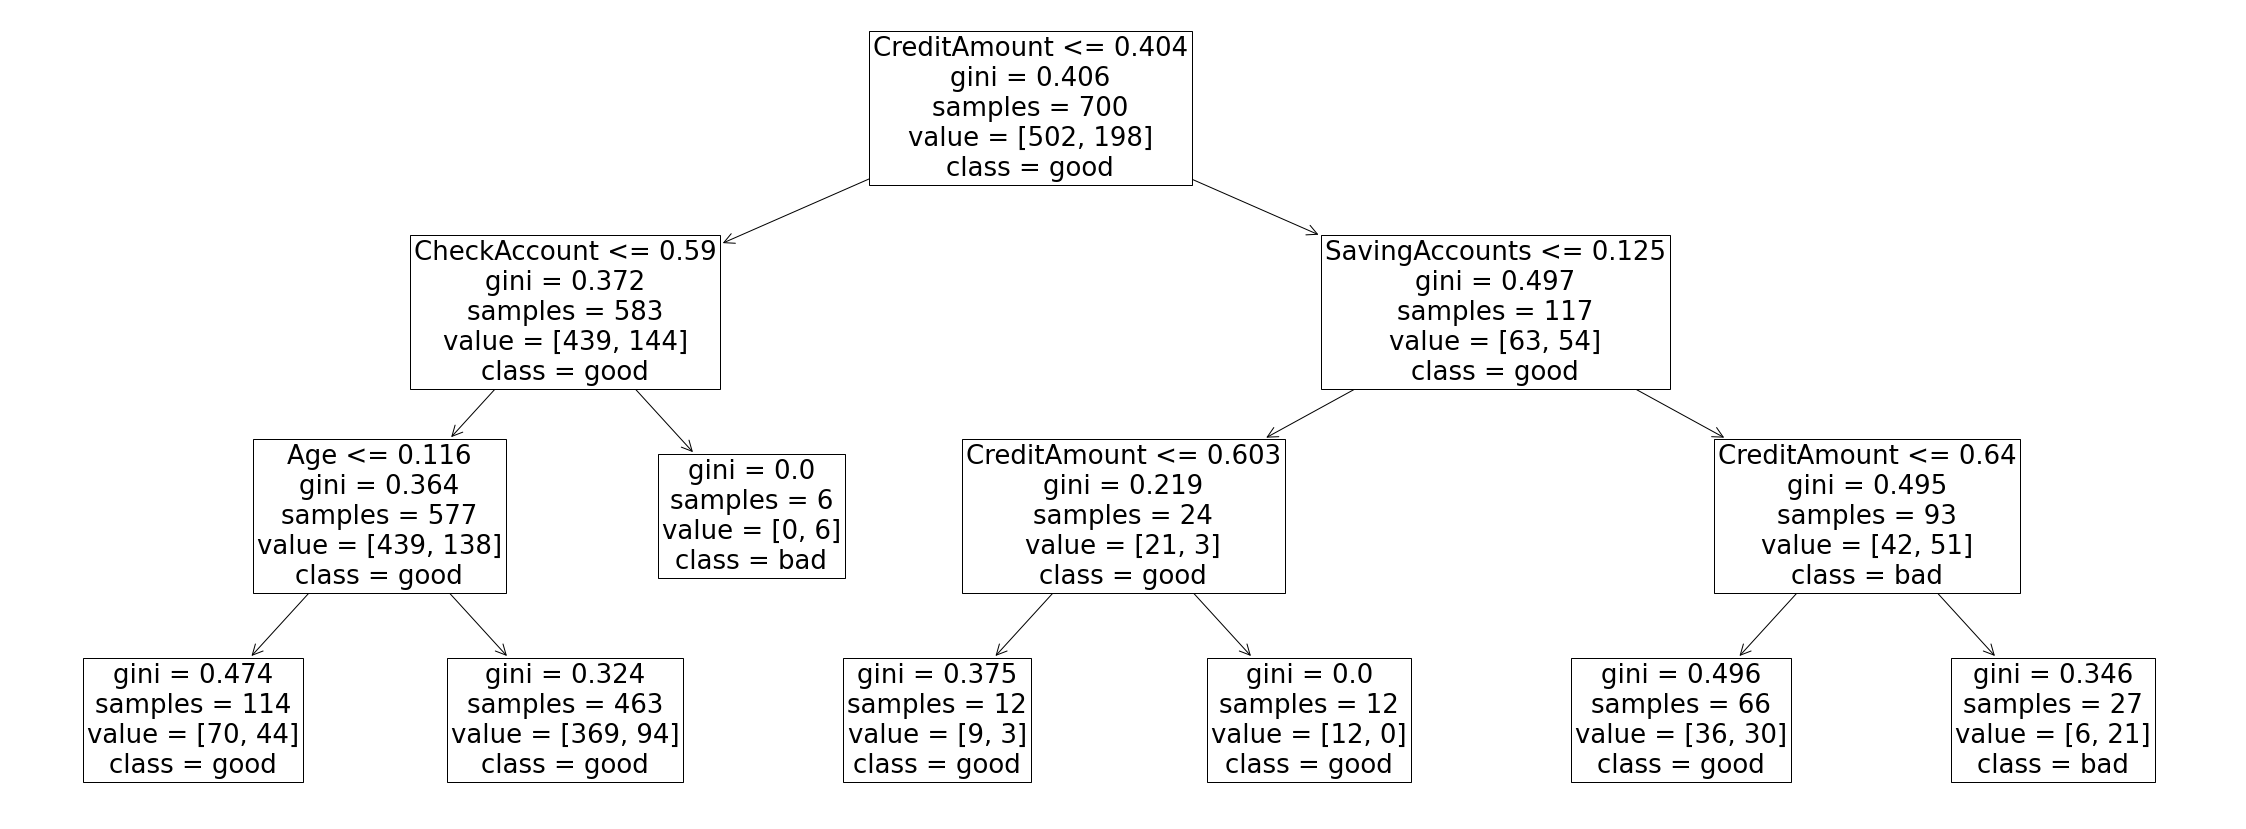

In [93]:
from sklearn import tree

target_names = ['good','bad']

plt.figure(figsize=(40,15))
_ = tree.plot_tree(dt2,feature_names = data.columns, class_names=target_names, fontsize=26)
plt.show()

In [159]:
y_predict1 = dt2.predict(x_test) 
print (metrics.accuracy_score(y_test,y_predict))

0.6866666666666666


In [160]:
x_predict1 = dt2.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.7271428571428571


In [161]:
print (cross_val_score(dt2, x,y, cv=10, scoring='accuracy').mean())


0.706


In [97]:
dt2_1 = data.drop('Age',axis =1)

In [98]:
dt2_1

,Sex,Job,Housing,SavingAccounts,CheckAccount,CreditAmount,Duration,Purpose
0,1.0,0.666667,0.5,0.00,0.333333,0.050567,0.029412,0.714286
1,0.0,0.666667,0.5,0.25,0.666667,0.313690,0.647059,0.714286
2,1.0,0.333333,0.5,0.25,0.000000,0.101574,0.117647,0.428571
3,1.0,0.666667,0.0,0.25,0.333333,0.419941,0.558824,0.571429
4,1.0,0.666667,0.0,0.25,0.333333,0.254209,0.294118,0.142857
...,...,...,...,...,...,...,...,...
995,0.0,0.333333,0.5,0.25,0.000000,0.081765,0.205882,0.571429
996,1.0,1.000000,0.5,0.25,0.333333,0.198470,0.382353,0.142857
997,0.0,0.666667,1.0,0.25,0.666667,0.057500,0.117647,0.142857
998,1.0,0.666667,0.5,0.00,0.333333,0.430395,0.382353,0.000000


In [99]:
x_train,x_test,y_train,y_test = train_test_split(dt2_1,target,test_size=0.3)
dt2_1 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [100]:
y_predict = dt2_1.predict(x_test) 
print (metrics.accuracy_score(y_test,y_predict))

0.7066666666666667


In [101]:
x_predict = dt2_1.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.71


In [102]:
print (cross_val_score(dt2_1, x,y, cv=10, scoring='accuracy').mean())


0.706


In [103]:
dt2_2 = data.drop('Sex',axis =1)

In [111]:
dt2_2

DecisionTreeClassifier(max_depth=3)

In [105]:
x_train,x_test,y_train,y_test = train_test_split(dt2_2,target,test_size=0.3)
dt2_2 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [106]:
y_predict = dt2_2.predict(x_test) 
print (metrics.accuracy_score(y_test,y_predict))

0.6966666666666667


In [107]:
x_predict = dt2_2.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.7328571428571429


In [108]:
print (cross_val_score(dt2_2, x,y, cv=10, scoring='accuracy').mean())

0.706


In [109]:
dt2_3 = data.drop('Job',axis =1)

In [110]:
x_train,x_test,y_train,y_test = train_test_split(dt2_3,target,test_size=0.3)
dt2_3 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [112]:
y_predict = dt2_3.predict(x_test) 
print (metrics.accuracy_score(y_test,y_predict))

0.7033333333333334


In [113]:
x_predict = dt2_3.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.74


In [114]:
print (cross_val_score(dt2_3, x,y, cv=10, scoring='accuracy').mean())

0.706


In [116]:
dt2_4 = data.drop('Housing',axis =1)

In [117]:
x_train,x_test,y_train,y_test = train_test_split(dt2_4,target,test_size=0.3)
dt2_4 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [118]:
y_predict = dt2_4.predict(x_test) 
print (metrics.accuracy_score(y_test,y_predict))

0.6933333333333334


In [119]:
x_predict = dt2_4.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.7328571428571429


In [120]:
print (cross_val_score(dt2_4, x,y, cv=10, scoring='accuracy').mean())

0.706


In [128]:
dt2_5 = data.drop('SavingAccounts',axis =1)

In [129]:
x_train,x_test,y_train,y_test = train_test_split(dt2_5,target,test_size=0.3)
dt2_5 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [130]:
y_predict = dt2_5.predict(x_test) 
print (metrics.accuracy_score(y_test,y_predict))

0.7133333333333334


In [134]:
x_predict = dt2_5.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.7414285714285714


In [135]:
print (cross_val_score(dt2_5, x,y, cv=10, scoring='accuracy').mean())

0.706


In [136]:
dt2_6 = data.drop('CreditAmount',axis =1)

In [137]:
x_train,x_test,y_train,y_test = train_test_split(dt2_6,target,test_size=0.3)
dt2_6 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [138]:
y_predict = dt2_6.predict(x_test) 
print (metrics.accuracy_score(y_test,y_predict))

0.69


In [139]:
x_predict = dt2_6.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.7471428571428571


In [140]:
print (cross_val_score(dt2_6, x,y, cv=10, scoring='accuracy').mean())

0.706


In [142]:
dt2_7 = data.drop('Duration',axis =1)

In [143]:
x_train,x_test,y_train,y_test = train_test_split(dt2_7,target,test_size=0.3)
dt2_7 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [145]:
y_predict = dt2_7.predict(x_test) 
print (metrics.accuracy_score(y_test,y_predict))

0.6633333333333333


In [146]:
x_predict = dt2_7.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.74


In [147]:
print (cross_val_score(dt2_7, x,y, cv=10, scoring='accuracy').mean())

0.706


In [151]:
dt2_8 = data.drop('Duration',axis =1)

In [152]:
x_train,x_test,y_train,y_test = train_test_split(dt2_8,target,test_size=0.3)
dt2_8 = DecisionTreeClassifier(max_depth=3).fit(x_train,y_train)

In [153]:
y_predict = dt2_8.predict(x_test) 
print (metrics.accuracy_score(y_test,y_predict))

0.6866666666666666


In [154]:
x_predict = dt2_8.predict(x_train)
print( metrics.accuracy_score(y_train, x_predict))

0.7271428571428571


In [155]:
print (cross_val_score(dt2_8, x,y, cv=10, scoring='accuracy').mean())

0.706


Show the confusion matrix of <i>dt2</i> and compare it with that of <i>dt1</i>. How accurate is <i>dt1</i> and <i>dt2</i> (% accuracy) predicting 'bad' customers, respectively? [2 marks]

<b>Answers</b>: 
From the confusiom matrix We have 159 people predicted with good credit (true positive) which is correct and 38 people predicted with bad credit (true negative) which is also correct.
Although we have 53 where we predicted would have good credit but actually has bad credit, and 50 where we predicted to have bad credit but actually have good credit

Among the 209 people who have good credit score the neural network correctly classifies (159/209) *100 = 76.1%
Among the 91 people who have bad credit the neural network correctly classifies (38/91)*100= 36.25% correct.
Overall the classification accuracy is 73.3% which is the same accuracy as when using (metrics.accuracy_score(y_test,y_pred)).
dt1 is better at prediciting the accuracy for those who have good credit when we compatre the % of 86.8%(dt1) to 76.1 %(dt2).
Although dt2 is better at predicitng those with bad credit as it has a higher % accuracy of 41.8% whereas dt1 had a % accuracy of 36.3%.

Although both dt1 and dt2 are still not as good as predicitng bad customers as they are at predicitng good customers.

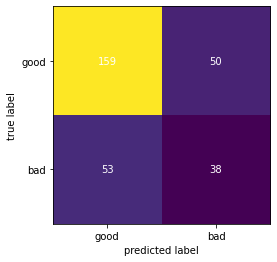

In [164]:
# Code: 
cm3 = confusion_matrix(y_test,y_predict1)

target_names = ['good', 'bad']
cf_matrix(cm3,target_names)

In practice, would bank managers prefer <i>dt1</i> or <i>dt2</i>, i.e. which one is better at predicting 'good' or 'bad' customers? [1 mark]

<b>Answers</b>:
From the model bank managers would prefer the dt1 model as it gives a higher % accuracy when prediciting good customers, but dt2 gave a higher %  compared to dt1 when it came to producting bad customers. Furthermore to know which was the best model we have to look at the % of the overall classification and dt1 gives a better overall classification accuracy of 73.3% whilst dt2 is 65.8%

### 3c. Tuning your decision decision trees

Experiment with different depths (2~8) of either <i>dt1</i> or <i>dt2</i>. Plot using appropriate method the tree depth against its corresponding accruacy evaluated by cross-validation. [2 marks]

<b>Answers</b>: 

In [48]:
# Code: 
from sklearn.model_selection import cross_val_score
k_range = range(2,9)
k_scores = []
for k in k_range:
    dt = DecisionTreeClassifier(max_depth=k)
    scores = cross_val_score(dt,data,target,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())
    
acc_dt = max(k_scores)
acc_dt #highest accuracy

0.709

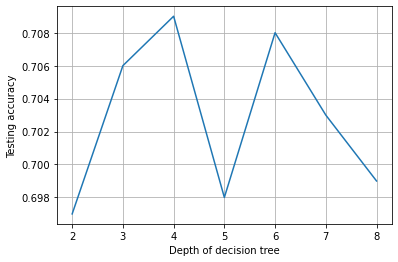

In [49]:
plt.plot(k_range,k_scores)
plt.xlabel('Depth of decision tree')
plt.ylabel('Testing accuracy')
plt.xticks(k_range)
plt.grid(axis='both')

In real-life, which tree depth would you select for better and easier decision making? Breifly explain the reasons. [0.5 marks]

<b>Answers</b>: 
The best depth of a decision tree model would range from 3-4. The best decisom tree depth can classify around 70.9% correctly.

### 3d. Decision making with the decision tree

Visualise your best decision tree model. Extract and explain one example rule from the tree (with regard to its branches and nodes). [1.5 marks]

<b>Answers</b>: 
The checkAccount is the root Node, if it is more than the normalized value 0.167 we go to the branch/subnode and meet the decision node of duration, if it is then more than 0.426 we go to the savings if it is more than 0.125 we can then tell if they will give a good or bad credit according to the model.

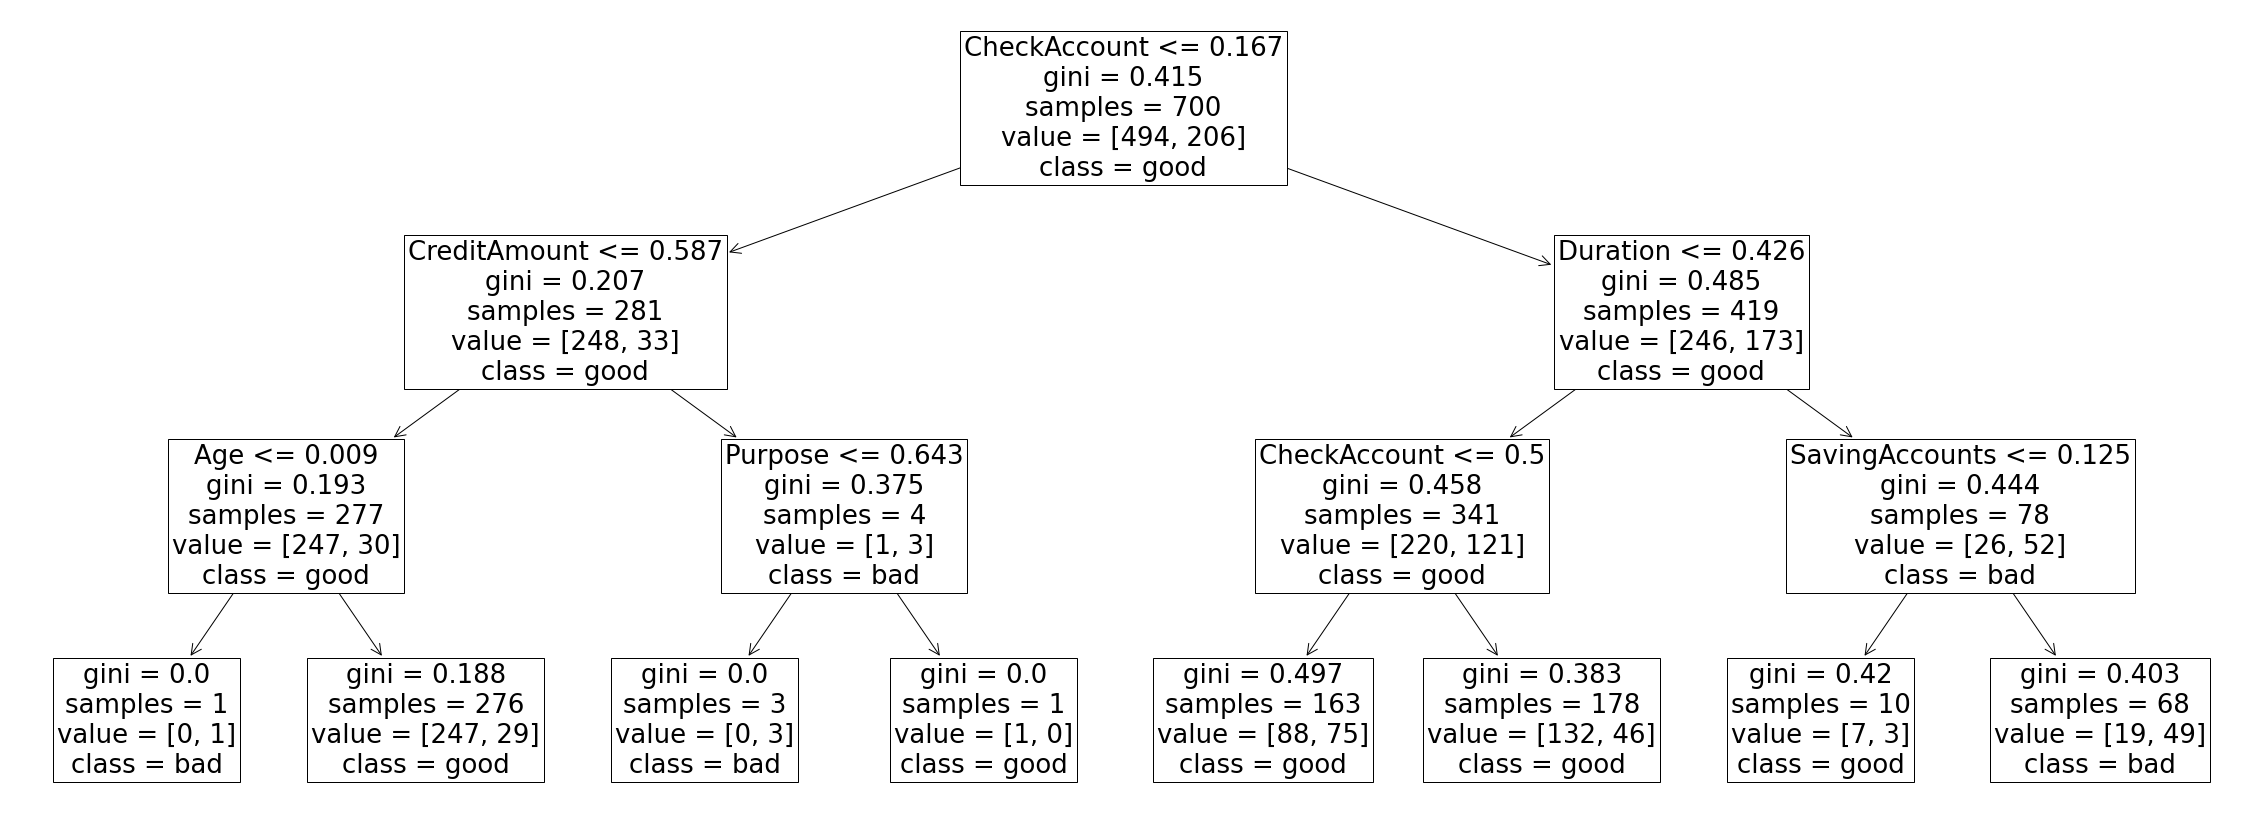

In [52]:
# Code: 
from sklearn import tree

target_names = ['good','bad']

plt.figure(figsize=(40,15))
_ = tree.plot_tree(dt1,feature_names = data.columns, class_names=target_names, fontsize=26)
plt.show()

A new <i>customer A</i> of age 40 with <font color = "red">CreditAmount</font> of 2000 applied to a loan. According to your best decision tree, should the bank manager grant the loan? Explain your reasoning with regard to the tree nodes and branches. [0.5 marks]<br>
Note: a typo corrected on 26/03/2021: <i>CheckAmount</i> is changed to <i>CreditAmount</i> in Question 3d.

<b>Answers</b>: 
According to the diagram this would mean the person has good credit, as 2000 when normlized gives a value lower than 0.587, which is evident when looking at the printed out value so yes for that leads us to the age, and 40 when normalized is more than 0.009 and a s a result means the customer would have good credit.

Based on your above analysis, is decision tree better than neural networks models? Which machine learning model would you recommend the bank manager to use? Why? [1 mark]

In [65]:
models = pd.DataFrame({'Model': ['ANN1', 'Decision Tree1','ANN2','Decision Tree2'],
                       'Accuracy': [0.7020000000000001, 0.706,0.7120000000000001,0.706]})
models

,Model,Accuracy
0,ANN1,0.702
1,Decision Tree1,0.706
2,ANN2,0.712
3,Decision Tree2,0.706


<b>Answers</b>: 
I personally beieve that a decision tree is better than a neural network model, as one is able to take the details of each customer and compare it to the detail we already have in that model and as a result makes the decision for the bank manager easier in deciding if one should be given good or bad credit.

However from looking at all the accuracy which I calculated the best model was the ann2 model, and therefore I would recommend the bank manager to use ann2.

## Appendix. Coursework Instructions

## Introduction

<b>Main tasks</b>: to build and analyse decision trees and neural networks for a classification task. Support of coursework include:
- Lab demos of data processing and machine learning models using different functions and methods in Python for different example problems;
- Example code building and analysing machine learning models, referring to content in COMP1008 on “Machine learning”.
- Q&A support for exercises in the labs to build different models using different methods / functions on example problems.
- In Teams channel 'COMP1008 Coursework': support of common questions in completing the coursework.

<b>Marks</b>: in total 25 marks, allocated on the basis of:
- knowledge and understanding showed when answering the questions in the Jupyter file report,
- how informative and well presented your code, visualisations and results are,
- self-learning ability making use of online resources,
- problem solving skills to achieve the answers and results,
- concise language and ease of reading, i.e. just enough details for others to repeat your methods and obtain the same results.

<b>Format</b>:
- One single .ipynb file named COMP1008cw-XXX.ipynb, where XXX is your username (e.g. psxyz). The .ipynb file should include your code and answers, using the above given .ipynb template (add markdown and code cells as needed).
- You could use additional Python libraries as you wish, in addition to the ones demonstrated in the labs.
- To answer the questions in the COMP1008 coursework, there are multiple ways using different functions / methods to support the analysis. All answers and analysis should be supported by the code implemented in Jupyter Notebook, not by using other means (e.g. Excel, other languages, etc.).
- More details are given in the <a href="https://moodle.nottingham.ac.uk/pluginfile.php/7184288/mod_tabbedcontent/tabcontent/21279/Assessment%20Sheet%20COMP1008.docx">COMP1008 coursework issue form</a>.

<b>Submission</b>: 
- Deadline: 23rd April 2021. Late submission leads to a 10% deduction of your coursework mark on each weekday. Any work submitted one week late will receive a zero mark for the coursework.
- Procedure: in Moodle submit a single .ipynb file named COMP1008cw-XXX.ipynb, where XXX is your username (e.g. psxyz).
- If you can’t submit your coursework on time due to Extenuating Circumstances, please contact Student Services and your personal tutor ASAP.

### Plagiarism vs. Group Discussions

As you should know, plagiarism is completely unacceptable and will be dealt with according to University's standard policies. Students are encouraged to have only general discussions regarding the theory (not the specific coursework questions) when completing the coursework.

It is important that when you actually do your coursework and write the answers, you do it individually. Do NOT, under any circumstances, share your report, code or figures, etc. with anyone else.